In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('data/covid19-global-forecasting-week-1/train.csv')
train_data.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [3]:
train_data.count()

Id                16756
Province/State     7670
Country/Region    16756
Lat               16697
Long              16697
Date              16756
ConfirmedCases    16756
Fatalities        16756
dtype: int64

In [4]:
train_data.isnull().sum()

Id                   0
Province/State    9086
Country/Region       0
Lat                 59
Long                59
Date                 0
ConfirmedCases       0
Fatalities           0
dtype: int64

## Data Cleaning: Missing (NaN) entries

### Missing lat long entries
Only Aruba lat long is missing.

Replace Aruba lat logn Nan with it's cordinates: 12.521110, -69.968338

In [5]:
q,=np.where(train_data['Country/Region'] == 'Aruba')
train_data.loc[q, ['Lat']] = 2.5211
train_data.loc[q, ['Long']] =- 69.9683

In [6]:
train_data[train_data['Country/Region'] == 'Aruba'].head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
413,652,NaN,Aruba,2.5211,-69.9683,2020-01-22,0.0,0.0
414,653,NaN,Aruba,2.5211,-69.9683,2020-01-23,0.0,0.0
415,654,NaN,Aruba,2.5211,-69.9683,2020-01-24,0.0,0.0
416,655,NaN,Aruba,2.5211,-69.9683,2020-01-25,0.0,0.0
417,656,NaN,Aruba,2.5211,-69.9683,2020-01-26,0.0,0.0


### Missing Province/State entries

Convert Country/Region class to numbered feature

In [7]:
countries = np.unique(train_data['Country/Region'])
countries_dict = {c:i for i, c in enumerate(countries)}
train_data['c_id'] = train_data['Country/Region'].map(countries_dict)
train_data.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,c_id
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,0


In [8]:
len(countries)

163

In [9]:
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia, The',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guadeloupe',
       'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Holy See',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia

In [10]:
## Replace NaN entries in Province/State to None and convert to numbered feature

In [11]:
provinces = np.unique(train_data['Province/State'][~train_data['Province/State'].isnull()])
provinces_dict = {p:i+1 for i, p in enumerate(provinces)}
provinces_dict.update({"None":0})
train_data['Province/State'].fillna('None', inplace=True)
train_data['p_id'] = train_data['Province/State'].map(provinces_dict)
train_data.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,c_id,p_id
0,1,None,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,0,0
1,2,None,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,0,0
2,3,None,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,0,0
3,4,None,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,0,0
4,5,None,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,0,0


In [12]:
len(provinces)

128

countries corresponding to cruise ship provinces

* Grand Princess >> 'Canada', 'US'
* Diamond Princess >> 'Cruise Ship', 'US'
* From Diamond Princess >> 'Australia'

In [13]:
provinces

array(['Alabama', 'Alaska', 'Alberta', 'Anhui', 'Arizona', 'Arkansas',
       'Aruba', 'Australian Capital Territory', 'Beijing',
       'British Columbia', 'California', 'Cayman Islands',
       'Channel Islands', 'Chongqing', 'Colorado', 'Connecticut',
       'Curacao', 'Delaware', 'Denmark', 'Diamond Princess',
       'District of Columbia', 'Faroe Islands', 'Florida', 'France',
       'French Guiana', 'French Polynesia', 'From Diamond Princess',
       'Fujian', 'Gansu', 'Georgia', 'Gibraltar', 'Grand Princess',
       'Guadeloupe', 'Guam', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan',
       'Hawaii', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei',
       'Hunan', 'Idaho', 'Illinois', 'Indiana', 'Inner Mongolia', 'Iowa',
       'Jiangsu', 'Jiangxi', 'Jilin', 'Kansas', 'Kentucky', 'Liaoning',
       'Louisiana', 'Macau', 'Maine', 'Manitoba', 'Maryland',
       'Massachusetts', 'Mayotte', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Montserrat', 'Neb

In [14]:
## Convert 'Data' in yyyy-mm-dd to days, with Jan 1 2020 being day 1

In [15]:

days = (0, 31,29+31)
train_data['month'] = pd.DatetimeIndex(train_data['Date']).month
days_dict = {i+1:d for i, d in enumerate(days)}
train_data['days'] = train_data['month'].map(days_dict)
train_data['days'] += pd.DatetimeIndex(train_data['Date']).day
train_data[train_data['Province/State']=='Arizona'].head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,c_id,p_id,month,days
12744,20089,Arizona,US,33.7298,-111.4312,2020-01-22,0.0,0.0,154,5,1,22
12745,20090,Arizona,US,33.7298,-111.4312,2020-01-23,0.0,0.0,154,5,1,23
12746,20091,Arizona,US,33.7298,-111.4312,2020-01-24,0.0,0.0,154,5,1,24
12747,20092,Arizona,US,33.7298,-111.4312,2020-01-25,0.0,0.0,154,5,1,25
12748,20093,Arizona,US,33.7298,-111.4312,2020-01-26,0.0,0.0,154,5,1,26


In [16]:
def plot_region(table, country, province='None', ax=None):
    """Plot daily confirmed and fatalties counts
    for input country
    """
    c_table = table[(table['Country/Region'] == country) & (table['Province/State'] == province)]
    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(4,3))
    ax.plot(c_table['days'], c_table['ConfirmedCases'], label='confirmed')
    ax.plot(c_table['days'], c_table['Fatalities'], label='fatalties')
    ax.set_title(f"{country}/{province}")

    ax.legend(loc=2, bbox_to_anchor=(1.01, 1.02))

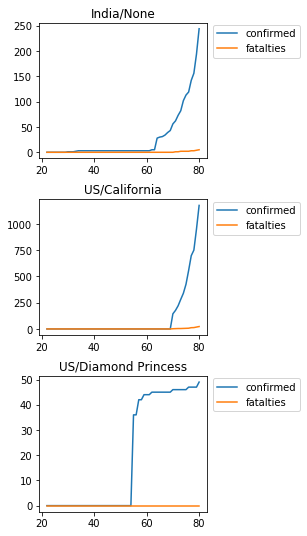

In [17]:
_, ax = plt.subplots(3, 1, figsize=(3,3*3))
plt.subplots_adjust(hspace=0.3)
plot_region(train_data, 'India', 'None', ax[0])
plot_region(train_data, 'US', 'California', ax[1])
plot_region(train_data, 'US', 'Diamond Princess', ax[2])

In [18]:
train_data.to_csv('data/covid19-global-forecasting-week-1/train_cleaned.csv')